In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For different functionals:

## Ecut convergence:

In [6]:
def ecut(filename, functional, ax):
    ecut_x = np.linspace(20,100, 9)
    ecut_y_Ry = pd.read_fwf(filename, header=None)
    ecut_y_eV = ecut_y_Ry*13.605703976
    ecut_y_eV = ecut_y_eV-ecut_y_eV.iloc[-1,0]
    ax.plot(ecut_x[2:], ecut_y_eV.iloc[2:], marker = '.',
            ls='-', lw=0.75)
    ax.axhline(ecut_y_eV.iloc[-1,0], color='gray', ls='--', lw =0.75, label= 'Converged Value')
    ax.axhline(ecut_y_eV.iloc[-1,0]+0.005, color='green', ls='--', lw =0.75, label = "5 meV Convergence \n Threshold")
    ax.set_xlabel('Energy Cutoff (mRy)')
    ax.set_ylabel('Energy (eV per atomic formula unit)')
    ax.set_title(""+functional+"\n ")

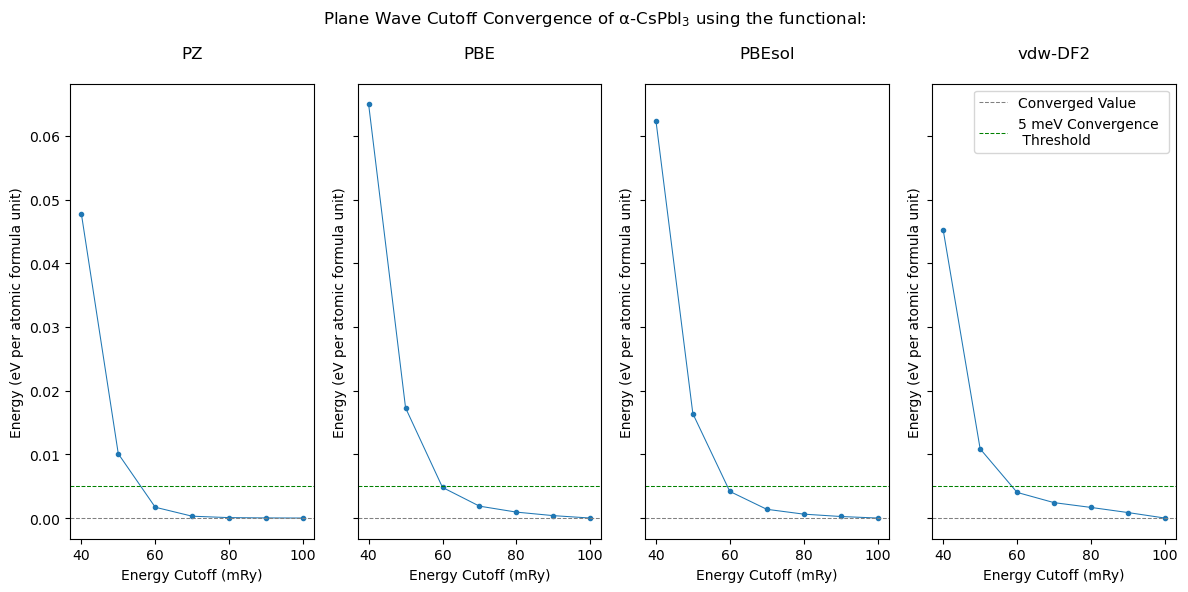

In [7]:
fig, [ax1,ax2, ax3, ax4] = plt.subplots(1,4, figsize=(12, 6), sharex = True, sharey=True)

plt.suptitle("Plane Wave Cutoff Convergence of α-CsPbI$_3$ using the functional:")

ecut('./Data/PZ/energyEcut.txt', 'PZ', ax1)
ecut('./Data/PBEsol/energyEcut.txt', 'PBEsol', ax3)
ecut('./Data/PBE/energyEcut.txt', 'PBE', ax2)
ecut('./Data/vdw-DF2/energyEcut.txt', 'vdw-DF2', ax4)
plt.legend(loc = 'upper right')
plt.tight_layout()

-1051.447869505816
-1054.5004772232758
-1051.6167342516874
-1064.4895385470988


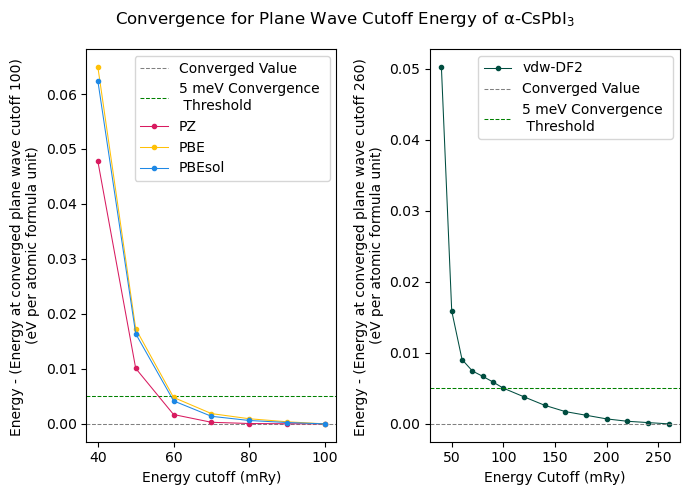

In [10]:
def ecut(filename, functional, ax, color):
    ecut_x = np.linspace(20,100, 9)
    ecut_y_Ry = pd.read_fwf(filename, header=None)
    ecut_y_eV = ecut_y_Ry*13.605703976
    print(ecut_y_eV.iloc[-1,0])
    ecut_y_eV = ecut_y_eV-ecut_y_eV.iloc[-1,0]

    ax.plot(ecut_x[2:], ecut_y_eV.iloc[2:], marker = '.',ls='-', lw=0.75, color=color, label=functional)
    ax.set_xlabel('Energy cutoff (mRy)')
    ax.set_ylabel('Energy - (Energy at converged plane wave cutoff 100) \n(eV per atomic formula unit)')

def ecutmore(filename, functional, ax, color):
    ecut_x = list(np.linspace(20,100, 9))+list((np.linspace(120,260,8)))
    ecut_y_Ry = pd.read_fwf(filename, header=None)
    ecut_y_eV = ecut_y_Ry*13.605703976
    print(ecut_y_eV.iloc[-1,0])

    ecut_y_eV = ecut_y_eV-ecut_y_eV.iloc[-1,0]

    ax.plot(ecut_x[2:], ecut_y_eV.iloc[2:], marker = '.',
            ls='-', lw=0.75, color = color, label=functional)
    ax.axhline(ecut_y_eV.iloc[-1,0], color='gray', ls='--', lw =0.75, label= 'Converged Value')
    ax.axhline(ecut_y_eV.iloc[-1,0]+0.005, color='green', ls='--', lw =0.75, label = "5 meV Convergence \n Threshold")
    ax.set_xlabel('Energy Cutoff (mRy)')
    ax.set_ylabel('Energy - (Energy at converged plane wave cutoff 260) \n(eV per atomic formula unit)')

fig, [ax1,ax2] = plt.subplots(1,2, figsize=(7, 5))

color = ['#D81B60', '#1E88E5', '#FFC107', '#004D40']

ax1.axhline(0, color='gray', ls='--', lw =0.75, label= 'Converged Value')
ax1.axhline(0+0.005, color='green', ls='--', lw =0.75, label = "5 meV Convergence \n Threshold")


ecut('./Data/PZ/energyEcut.txt', 'PZ', ax1, color[0])
ecut('./Data/PBE/energyEcut.txt', 'PBE', ax1, color[2])
ecut('./Data/PBEsol/energyEcut.txt', 'PBEsol', ax1, color[1])
ecutmore('./Data/vdw-DF2/energyEcut_more.txt', 'vdw-DF2', ax2,color[3])
ax1.legend()
plt.suptitle("Convergence for Plane Wave Cutoff Energy of α-CsPbI$_3$")

plt.legend(loc = 'upper right')

plt.tight_layout()
plt.savefig('./pics/PlaneWaveCutoff2.png', dpi=300)

## k-point convergence:

In [197]:
def k_point(filename, functional, ax):
    Kpoint_x = np.linspace(4,16, 13)
    Kpoints_y_Ry = pd.read_fwf(filename, header=None)
    Kpoints_y_eV = Kpoints_y_Ry*13.605703976

    #plt.figure(figsize=[7,5])
    ax.plot(Kpoint_x, Kpoints_y_eV, marker = '.',ls='-', lw=0.75)
    ax.axhline(Kpoints_y_eV.iloc[-1,0], color='gray', ls='--', lw =0.75, label = "Converged \nValue")
    ax.axhline(Kpoints_y_eV.iloc[-1,0]+0.005, color='green', ls='--', lw =0.75, label = '5 meV \nConvergence \n Threshold')
    ax.axhline(Kpoints_y_eV.iloc[-1,0]-0.005, color='green', ls='--', lw =0.75)
    ax.set_xlabel('$N_k$')
    ax.set_ylabel('Energy \n(eV per atomic formula unit)')
    ax.set_title(""+functional+"\n ")
    #ax.legend()
    #ax.tight_layout()


-1051.4872132560606
-1051.653683261975
-1054.534656656462
-1064.514618349409


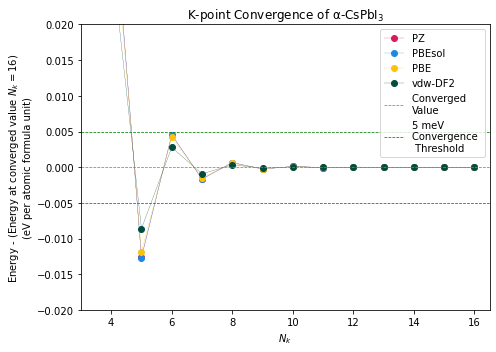

In [424]:
def k_point_100(filename, functional, ax, label,color):
    Kpoint_x = np.linspace(4,16, 13)
    Kpoints_y_Ry = pd.read_fwf(filename, header=None)
    Kpoints_y_eV = Kpoints_y_Ry*13.605703976
    conv = Kpoints_y_eV.iloc[-1,0]
    print(Kpoints_y_eV.iloc[-1,0])

    Kpoints_y_eV = Kpoints_y_eV-conv

    #plt.figure(figsize=[7,5])
    ax.plot(Kpoint_x, Kpoints_y_eV, marker = 'o',ls='-', lw=0.25, label = label,color = color)
    ax.set_xlabel('$N_k$')
    ax.set_ylabel('Energy - (Energy at converged value $N_k=16$) \n(eV per atomic formula unit)')
    ax.set_title(""+functional+"\n ")
    #ax.legend()
    #ax.tight_layout()


def k_point_vdw(filename, functional, ax):
    Kpoint_x = np.linspace(4,16, 13)
    Kpoints_y_Ry = pd.read_fwf(filename, header=None)
    Kpoints_y_eV = Kpoints_y_Ry*13.605703976
    conv = Kpoints_y_eV.iloc[-1,0]
    print(Kpoints_y_eV.iloc[-1,0])

    Kpoints_y_eV = Kpoints_y_eV-conv
    #plt.figure(figsize=[7,5])
    ax.plot(Kpoint_x, Kpoints_y_eV,ls='-', lw=0.75, label = 'vdw-DF2')
    ax.axhline(Kpoints_y_eV.iloc[-1,0], color='gray', ls='--', lw =0.75, label = "Converged \nValue")
    ax.axhline(Kpoints_y_eV.iloc[-1,0]+0.005, color='green', ls='--', lw =0.75, label = '5 meV \nConvergence \n Threshold')
    ax.axhline(Kpoints_y_eV.iloc[-1,0]-0.005, color='green', ls='--', lw =0.75)
    ax.set_xlabel('$N_k$')
    ax.set_ylabel('Energy - (Energy at converged value $N_k=16$) \n(eV per atomic formula unit)')
    ax.set_title(""+functional+"\n ")
    #ax.legend()
    #ax.tight_layout()

    
fig, ax1 = plt.subplots(1,1, figsize=(7, 5), sharex = True, sharey=False)


k_point_100('./Data/PZ/energyKpoints.txt','PZ', ax1, 'PZ', '#D81B60')
k_point_100('./Data/PBEsol/energyKpoints.txt', 'PBEsol', ax1, 'PBEsol', '#1E88E5')
k_point_100('./Data/PBE/energyKpoints.txt', 'PBE', ax1, 'PBE', '#FFC107')
k_point_100('./Data/vdw-DF2/energyKpoints.txt', 'vdw-DF2', ax1, 'vdw-DF2', '#004D40')

ax1.axhline(0, color='gray', ls='--', lw =0.75, label = "Converged \nValue")
ax1.axhline(0+0.005, color='green', ls='--', lw =0.75, label = '5 meV \nConvergence \n Threshold')
ax1.axhline(0-0.005, color='green', ls='--', lw =0.75)

ax2.legend()
ax1.legend()
ax1.set_ylim(-0.02,0.02)
ax2.set_ylim(-0.02,0.02)
ax1.set_xlim(3,16.5)
ax2.set_xlim(3,16.5)
plt.legend(loc = 'upper right')
plt.title("K-point Convergence of α-CsPbI$_3$")

plt.tight_layout()
plt.savefig('./pics/K-pointConvergence2.png', dpi=300)

## Bands and DOS

In [129]:
def plotbands(filename, color, ax):
    data_bands = np.loadtxt(filename)

    k = np.unique(data_bands[:, 0])
    bands = np.reshape(data_bands[:, 1], (-1, len(k)))

    for band in range(len(bands)):
        ax.plot(k, bands[band, :], linewidth=1, alpha=0.5, c=color)
    
    path = ['$\Gamma$','X','M','$\Gamma$','R','X','M', 'R']
    ax.set_xticks([0.0000,0.5000,1.0000,1.7071,2.5731,3.2802,3.7802,4.2802])
    ax.set_xticklabels(path)
    ax.axvline(0.0000, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(0.5000, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(1.0000, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(1.7071, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(2.5731, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(3.2802, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(3.7802, lw =0.5,ls ='-.', color = 'grey')
    ax.axvline(4.2802, lw =0.5,ls ='-.', color = 'grey')


In [211]:
def dos(filename, color, ax, label):
    dos = pd.read_fwf(filename) 
    ax.plot(dos.iloc[:,1],dos.iloc[:,0], color = color, label = label, lw = 0.5)


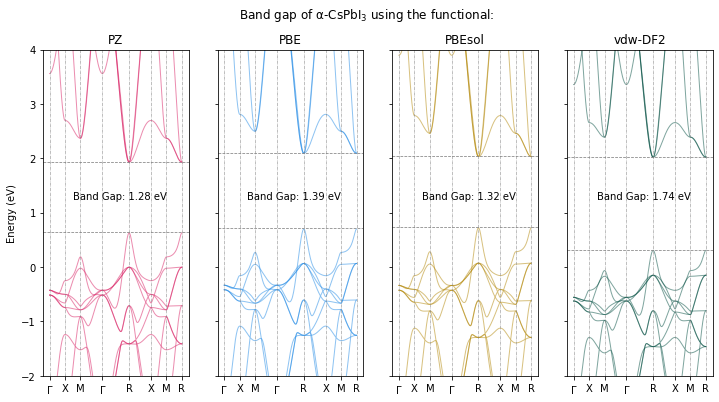

In [460]:
fig, [ax0, ax1,ax2, ax3] = plt.subplots(1,4, figsize=(12, 6), sharey = True)

plt.suptitle("Band gap of α-CsPbI$_3$ using the functional:")#, y=0.95)

plotbands('./Data/PZ/CsPbI3_more_bands_161616.dat.gnu',         color[0], ax0)
plotbands('./Data/PBE/CsPbI3_more_bands_161616.dat.gnu',        color[1], ax1)
plotbands('./Data/PBEsol/CsPbI3_more_bands_161616.dat.gnu',     '#B18400', ax2)
plotbands('./Data/vdw-DF2/CsPbI3_100ecut_bands_161616.dat.gnu', color[3], ax3)

ax1.set_ylim(-2,4)

ax0.axhline(0.65, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax0.axhline(1.93, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax0.text(0.75, 1.25, "Band Gap: " + str(round((1.93-0.65),4))+" eV")
ax0.set_title('PZ')

ax1.axhline(0.71, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax1.axhline(2.1, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax1.text(0.75, 1.25, "Band Gap: " + str(round((2.1-0.71),4))+" eV")
ax1.set_title('PBE')

ax2.axhline(0.73, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax2.axhline(2.05, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax2.text(0.75, 1.25, "Band Gap: " + str(round((2.05-0.73),4))+" eV")
ax2.set_title('PBEsol')

ax3.axhline(0.31, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax3.axhline(2.02, color='gray', ls='--', lw =0.75, label = "Converged Value")
ax3.text(0.75, 1.25, "Band Gap: " + str(round((2.05-0.31),4))+" eV")
ax3.set_title('vdw-DF2')

ax0.set_ylabel('Energy (eV)')

plt.savefig('./pics/band_gap', dpi=300)

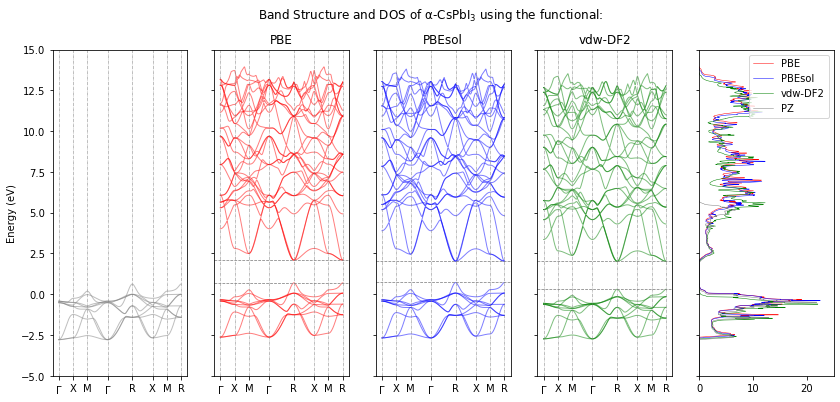

In [218]:
fig, [ax0,ax1,ax2, ax3, ax4] = plt.subplots(1,5, figsize=(14, 6), sharey = True)

plt.suptitle("Band Structure and DOS of α-CsPbI$_3$ using the functional:")

plotbands('./Data/nscf/CsPbI3_dos_bands_161616.dat.gnu', 'grey', ax0)
plotbands('./Data/PBE/CsPbI3_more_bands_161616.dat.gnu', 'red', ax1)
plotbands('./Data/PBEsol/CsPbI3_more_bands_161616.dat.gnu', 'blue', ax2)
plotbands('./Data/vdw-DF2/CsPbI3_more_bands_161616.dat.gnu', 'green', ax3)

dos('./Data/PBE/CsPbI3_dos_161616.dat', 'red', ax4, 'PBE')
dos('./Data/PBEsol/CsPbI3_dos_161616.dat', 'blue', ax4, 'PBEsol')
dos('./Data/vdw-DF2/CsPbI3_dos_tetra.dat', 'green', ax4, 'vdw-DF2')
dos('./Data/nscf/CsPbI3_dos_tetra_161616.dat', 'grey', ax4, 'PZ')


ax1.axhline(0.71, color='gray', ls='--', lw =0.75)
ax1.axhline(2.1, color='gray', ls='--', lw =0.75)
ax1.set_title('PBE')

ax2.axhline(0.73, color='gray', ls='--', lw =0.75)
ax2.axhline(2.05, color='gray', ls='--', lw =0.75)
ax2.set_title('PBEsol')

ax3.axhline(0.31, color='gray', ls='--', lw =0.75)
ax3.axhline(2.02, color='gray', ls='--', lw =0.75)
ax3.set_title('vdw-DF2')

ax0.set_ylabel('Energy (eV)')

ax1.set_ylim(-5,15)
ax4.set_xlim(0,25)

plt.legend(loc='upper right')

plt.show()

In [ ]:
## REDO the above graph with a 4th sublot that has all the 
# density of states w.r.t the diff functionals
#

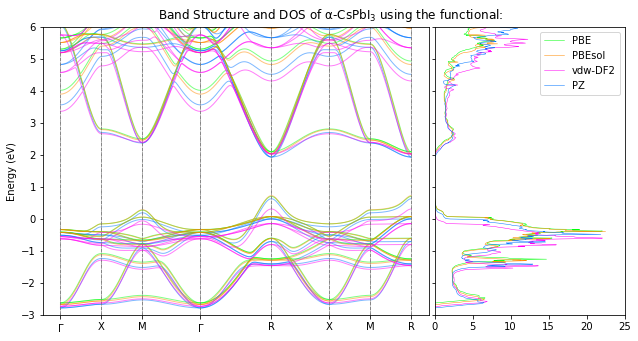

In [229]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

ax1_width = 0.67  # 2/3 of total width
ax2_width = 1 - ax1_width

ax1.set_position([0.0, 0.0, ax1_width, 1.0])
ax2.set_position([ax1_width+0.01, 0.0, ax2_width, 1.0])

plt.suptitle("Band Structure and DOS of α-CsPbI$_3$ using the functional:", y=1.07)

plotbands('./Data/PZ/CsPbI3_more_bands_161616.dat.gnu',      '#0075FF', ax1)
plotbands('./Data/PBE/CsPbI3_more_bands_161616.dat.gnu',     '#00FF0A', ax1)
plotbands('./Data/PBEsol/CsPbI3_more_bands_161616.dat.gnu',  '#FF8A00', ax1)
plotbands('./Data/vdw-DF2/CsPbI3_more_bands_161616.dat.gnu', '#FF00F5', ax1)

dos('./Data/PBE/CsPbI3_dos_161616.dat', '#00FF0A', ax2, 'PBE')
dos('./Data/PBEsol/CsPbI3_dos_161616.dat', '#FF8A00', ax2, 'PBEsol')
dos('./Data/vdw-DF2/CsPbI3_dos_tetra.dat', '#FF00F5', ax2, 'vdw-DF2')
dos('./Data/PZ/CsPbI3_morebands.dat', '#0075FF', ax2, 'PZ')


#ax1.axhline(0.71, color='gray', ls='--', lw =0.75)
#ax1.axhline(2.1, color='gray', ls='--', lw =0.75)
#ax1.set_title('PBE')
#
#ax2.axhline(0.73, color='gray', ls='--', lw =0.75)
#ax2.axhline(2.05, color='gray', ls='--', lw =0.75)
#ax2.set_title('PBEsol')
#
#ax3.axhline(0.31, color='gray', ls='--', lw =0.75)
#ax3.axhline(2.02, color='gray', ls='--', lw =0.75)
#ax3.set_title('vdw-DF2')

ax1.set_ylabel('Energy (eV)')

ax1.set_ylim(-3,6)
ax2.set_xlim(0,25)

plt.legend(loc='upper right')

plt.show()

In [161]:
print(np.linspace(20, 260, 13))

[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 220. 240. 260.]


(-2.0, 5.0)

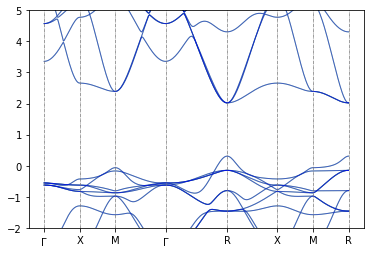

In [188]:
fig, ax = plt.subplots()

plotbands('./Data/vdw-DF2/CsPbI3_100ecut_bands_161616.dat.gnu', 'green', ax)
plotbands('./Data/vdw-DF2/CsPbI3_more_bands_161616.dat.gnu', 'blue', ax)
ax.set_ylim(-2,5)


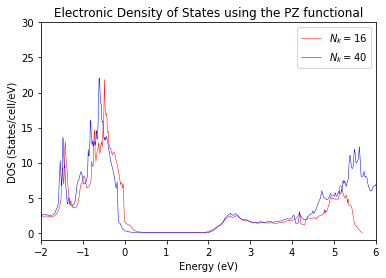

In [331]:
def dosdirect(filename, color, ax, label):
    dos = pd.read_fwf(filename) 
    ax.plot(dos.iloc[:,0],dos.iloc[:,1], color = color, label = label, lw = 0.5)


fig, ax = plt.subplots()

dosdirect('./Data/nscf/CsPbI3_dos_tetra_161616.dat', 'red', ax, '$N_k =$16')
dosdirect('./Data/vdw-DF2/CsPbI3_dos_161616.dat', 'blue', ax, '$N_k =$40')

plt.legend()
ax.set_xlim(-2,6)
ax.set_ylim(-1,30)
ax.set_title("Electronic Density of States using the PZ functional")
ax.set_ylabel("DOS (States/cell/eV)")
ax.set_xlabel("Energy (eV)")
plt.show()

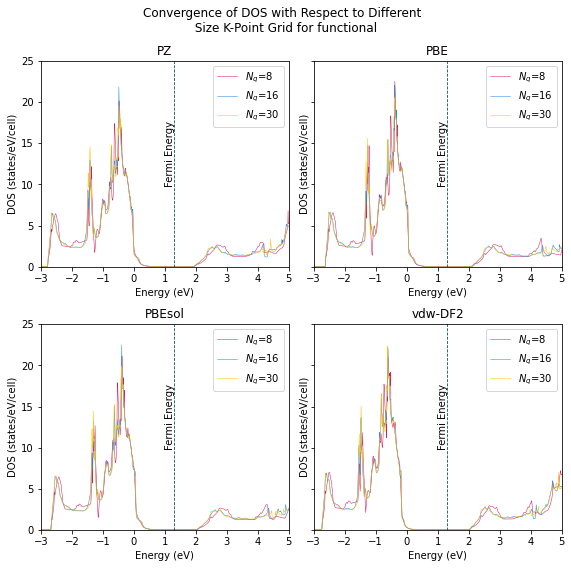

In [457]:
fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(2, 2,figsize = [8,8], sharey=True, sharex=False)

dosdirect('./Data/PZ/CsPbI3_dos_tetra_888.dat',    color[0], ax1,   '$N_q$=8' )
dosdirect('./Data/PZ/CsPbI3_dos_tetra_161616.dat', color[1], ax1,    '$N_q$=16')
dosdirect('./Data/PZ/CsPbI3_dos_tetra_303030.dat', color[2], ax1,       '$N_q$=30')

dosdirect('./Data/PBE/CsPbI3_dos_tetra_888.dat',    color[0] , ax2,     '$N_q$=8' )
dosdirect('./Data/PBE/CsPbI3_dos_161616.dat',       color[1], ax2,   '$N_q$=16')
dosdirect('./Data/PBE/CsPbI3_dos_tetra_303030.dat', color[2], ax2,      '$N_q$=30')

dosdirect('./Data/PBEsol/CsPbI3_dos_tetra_888.dat',    color[0], ax3,    '$N_q$=8' )
dosdirect('./Data/PBEsol/CsPbI3_dos_161616.dat',       color[1], ax3,    '$N_q$=16')
dosdirect('./Data/PBEsol/CsPbI3_dos_tetra_303030.dat', color[2], ax3,    '$N_q$=30')

dosdirect('./Data/vdw-DF2/CsPbI3_dos_888.dat',          color[0], ax4,    '$N_q$=8' )
dosdirect('./Data/vdw-DF2/CsPbI3_dos_161616.dat',       color[1], ax4,    '$N_q$=16')
dosdirect('./Data/vdw-DF2/CsPbI3_dos_tetra_303030.dat', color[2], ax4,    '$N_q$=30')

ax3.set_xlim(-3, 5)
ax3.set_ylim(0, 25)
ax3.set_xlabel("Energy (eV)")
ax3.set_ylabel("DOS (states/eV/cell)")
ax3.set_title('PBEsol')
ax3.legend()
ax3.axvline(1.3, ls = '--', lw=0.8, color = color[3])
ax3.annotate('Fermi Energy', (1., 10),rotation=90 )
ax4.set_xlim(-3, 5)
ax4.set_ylim(0, 25)
ax4.set_xlabel("Energy (eV)")
ax4.set_ylabel("DOS (states/eV/cell)")
ax4.set_title('vdw-DF2')
ax4.legend()
ax4.axvline(1.3, ls = '--', lw=0.8, color = color[3])
ax4.annotate('Fermi Energy', (1., 10),rotation=90 )
ax1.set_xlim(-3, 5)
ax1.set_ylim(0, 25)
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel("DOS (states/eV/cell)")
ax1.set_title('PZ')
ax1.legend()
ax1.axvline(1.3, ls = '--', lw=0.8, color = color[3])
ax1.annotate('Fermi Energy', (1., 10),rotation=90 )
ax2.set_xlim(-3, 5)
ax2.set_ylim(0, 25)
ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel("DOS (states/eV/cell)")
ax2.set_title('PBE')
ax2.legend()
ax2.axvline(1.3, ls = '--', lw=0.8, color = color[3])
ax2.annotate('Fermi Energy', (1., 10),rotation=90 )

plt.suptitle('Convergence of DOS with Respect to Different \n Size K-Point Grid for functional')
plt.tight_layout()

plt.savefig('./pics/All_functionals_k-point_dos.png', dpi=300)



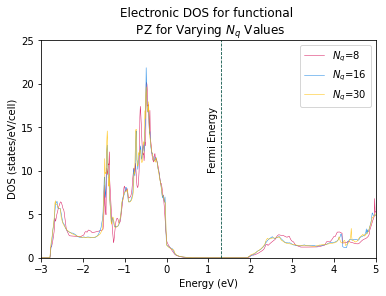

In [452]:
fig, ax = plt.subplots(1, 1,figsize = [6,4], sharey=True, sharex=True)

dosdirect('./Data/PZ/CsPbI3_dos_tetra_888.dat',    color[0], ax, '$N_q$=8')
dosdirect('./Data/PZ/CsPbI3_dos_tetra_161616.dat', color[1], ax, '$N_q$=16')
dosdirect('./Data/PZ/CsPbI3_dos_tetra_303030.dat', color[2], ax, '$N_q$=30')
ax.set_xlim(-3, 5)
ax.set_ylim(0, 25)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("DOS (states/eV/cell)")
ax.set_title('Electronic DOS for functional \n PZ for Varying $N_q$ Values')
ax.legend()
ax.axvline(1.3, ls = '--', lw=0.8, color = color[3])
ax.annotate('Fermi Energy', (1., 10),rotation=90 )
plt.savefig('./pics/PZ_k-point_dos.png', dpi=300, )

FileNotFoundError: [Errno 2] No such file or directory: './Data/vdw-DF2/CsPbI3_dos_tetra.dat'

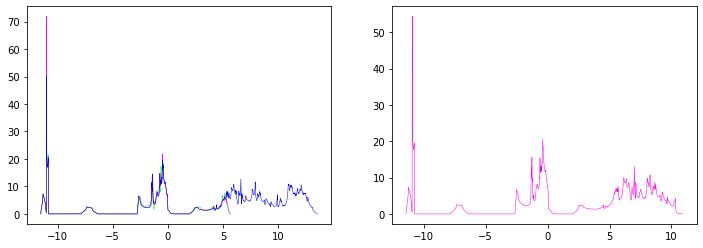

In [305]:
fig, [ax1,ax2] = plt.subplots(1, 3,figsize = [12,4])

#dosdirect('./Data/nscf/CsPbI3_dos_tetra_666.dat',    '#0075FF', ax,'$N_k$=6')
dosdirect('./Data/nscf/CsPbI3_dos_tetra_888.dat',    '#00FF0A', ax1, '$N_k$=8')
#dosdirect('./Data/nscf/CsPbI3_dos_tetra_121212.dat', '#FF8A00', ax, '$N_k$=12')
dosdirect('./Data/nscf/CsPbI3_dos_tetra_161616.dat', '#FF00F5', ax1, '$N_k$=16')
dosdirect('./Data/nscf/CsPbI3_dos_tetra_303030.dat', 'blue', ax1,    '$N_k$=30')

dosdirect('./Data/vdw-DF2/CsPbI3_dos_tetra_303030.dat', '#FF00F5', ax2, '$N_k$=16')
dosdirect('./Data/vdw-DF2/CsPbI3_dos_tetra.dat', 'blue', ax2,    '$N_k$=30')

ax1.set_xlim(-3, 5)
ax1.set_ylim(0, 25)
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel("DOS (states/eV/cell)")
ax1.set_title('Convergence of DOS with Respect to Different \n Size K-Point Grid for functional PZ')

ax2.set_xlim(-3, 5)
ax2.set_ylim(0, 25)
ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel("DOS (states/eV/cell)")
ax2.set_title('Convergence of DOS with Respect to Different \n Size K-Point Grid for functional PBE')

plt.legend()
plt.savefig('./pics/PZ_k-point_dos.png', dpi=300)
plt.show()
